<a href="https://colab.research.google.com/github/Akith-002/titanic_stat/blob/main/Graphical_presentation_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

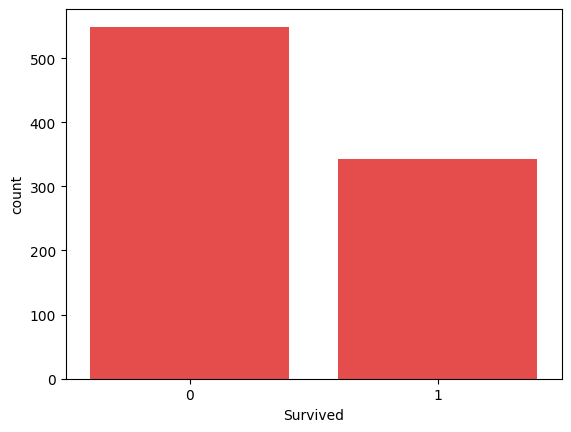

In [ ]:
p1 = sns.countplot(x='Survived', data=df, alpha=0.8, color='red')

[Text(0.5, 0, 'Survival Condition'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Composition of passengers by survival condition')]

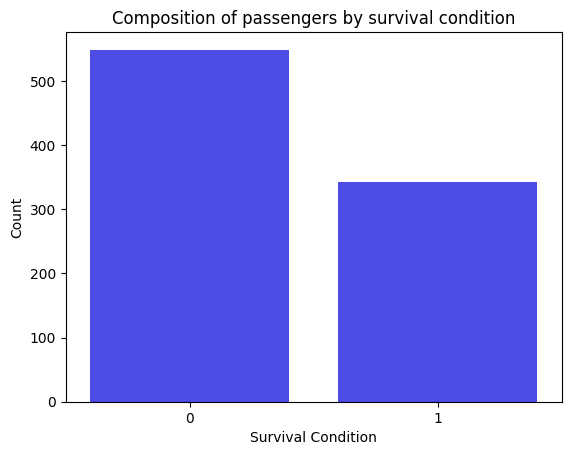

In [ ]:
p1 = sns.countplot(x='Survived', data=df, alpha=0.8, color='blue')
p1.set(xlabel='Survival Condition', ylabel='Count', title='Composition of passengers by survival condition')

[Text(0.5, 0, 'Survival Condition'),
 Text(0, 0.5, 'Percentage'),
 Text(0.5, 1.0, 'Composition of passengers by survival condition')]

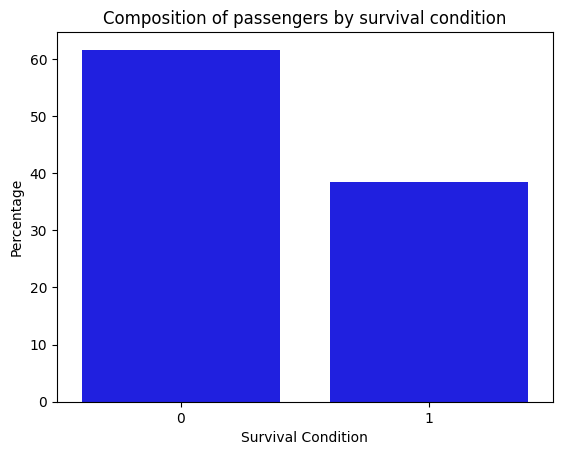

In [ ]:
p2 = sns.barplot(x = 'Survived',
                 y = 'Survived',
                 data = df,
                 estimator = lambda x: len(x) / len(df) * 100,
                 color = 'blue'
                 )
p2.set(xlabel = 'Survival Condition', ylabel = 'Percentage', title = 'Composition of passengers by survival condition')

## Lambdas:
the expression comprises of three essential parts.

In [ ]:
def my_function(x, y):
  y = y+2
  print("Welcome " + x + "!! Your waiting number is " + str(y))

my_function("Akith", 4)

Welcome Akith!! Your waiting number is 6


In [ ]:
(lambda x, z: x+z)(2, 5)

7

In [ ]:
add = lambda x, y: x+y
add(2, 5)

7

In [ ]:
vec = np.array([0, 1, 1, 1, 0, 0])
len(vec)

6

## Describing Qualitative Data


1.   Simple Bar Chart
2.   Composite Bar Chart





---
1.Simple Bar chart



In [ ]:
survival_count = pd.crosstab(index=df['Survived'], columns='count')
survival_count

col_0,count
Survived,
0,549
1,342


In [ ]:
survival_count = df['Survived'].value_counts()
survival_count

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
survival_count = df['Survived'].value_counts().rename_axis("Type").reset_index()
survival_count

,Type,Survived
0,0,549
1,1,342


In [ ]:
survival_count['Percentage'] = survival_count.Survived / survival_count.Survived.sum()
survival_count

,Type,Survived,Percentage
0,0,549,0.616162
1,1,342,0.383838


[Text(0.5, 0, 'Survival condition'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Composition of passengers by survival condition')]

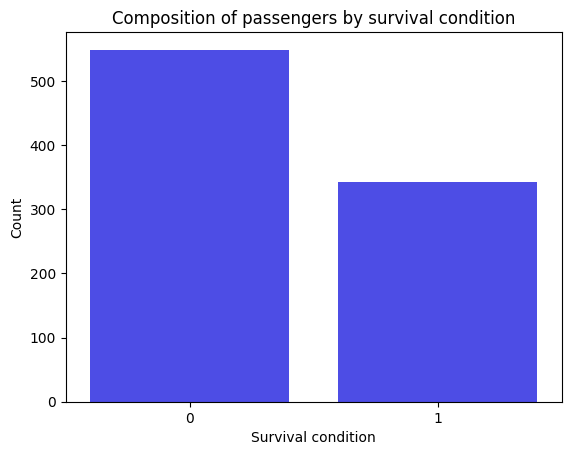

In [ ]:
p1 = sns.countplot(x='Survived', data=df, alpha=0.8, color = 'blue')
p1.set(xlabel='Survival condition', ylabel='Count',
       title='Composition of passengers by survival condition')

[Text(0.5, 0, 'Survival condition'),
 Text(0, 0.5, 'Percentage (%)'),
 Text(0.5, 1.0, 'Composition of passengers by survival condition')]

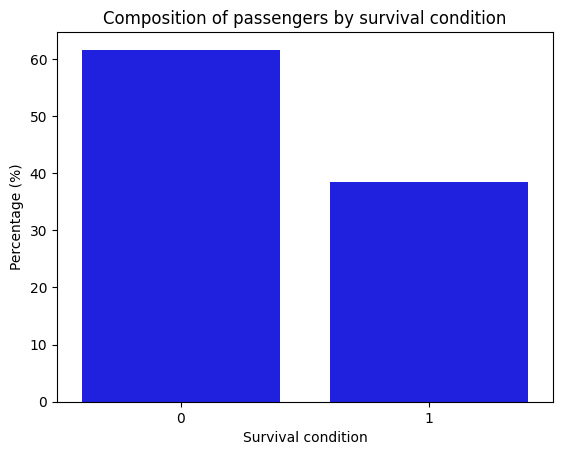

In [ ]:
p2 = sns.barplot(x= 'Survived',
                 y = 'Survived',
                 data = df,
                 estimator = lambda x: len(x) / len(df) * 100,
                 color = 'blue')
p2.set(xlabel='Survival condition', ylabel='Percentage (%)',
       title = 'Composition of passengers by survival condition')



---
2. Composite Bar Chart


> a.Component Bar Chart/ stacked bar plots




In [ ]:
twoway = pd.crosstab(index=df['Pclass'], columns=df['Survived'], margins=False).reset_index()
twoway

Survived,Pclass,0,1
0,1,80,136
1,2,97,87
2,3,372,119


In [ ]:
twoway = pd.crosstab(index=df['Pclass'], columns=df['Survived'], margins=False).reset_index()
twoway = twoway.rename(columns={0: 'Died', 1:'Survived'})
twoway

Survived,Pclass,Died,Survived
0,1,80,136
1,2,97,87
2,3,372,119


# Overlaying Plots

[Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Composition of passengers by passenger class and survival condition')]

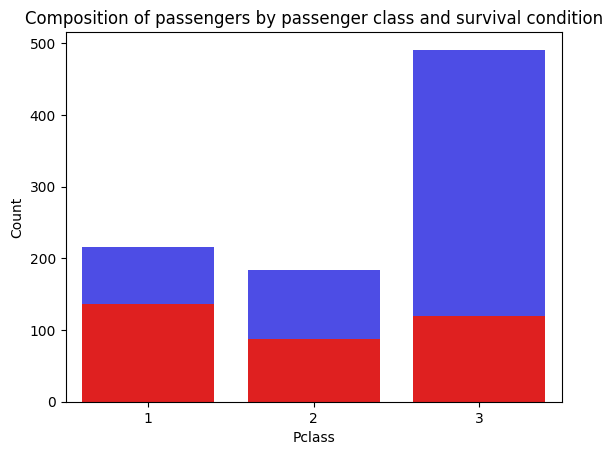

In [ ]:
sns.countplot(x='Pclass', data=df, alpha=0.8, color='blue')
s2 = sns.barplot(x ='Pclass', y='Survived', data=twoway, color='red')
s2.set(ylabel = 'Count',
       title='Composition of passengers by passenger class and survival condition')

> b.Multiple Bar chart

In [ ]:
df1 = pd.melt(twoway, id_vars='Pclass', var_name='Type', value_name="Count")
df1

,Pclass,Type,Count
0,1,Died,80
1,2,Died,97
2,3,Died,372
3,1,Survived,136
4,2,Survived,87
5,3,Survived,119


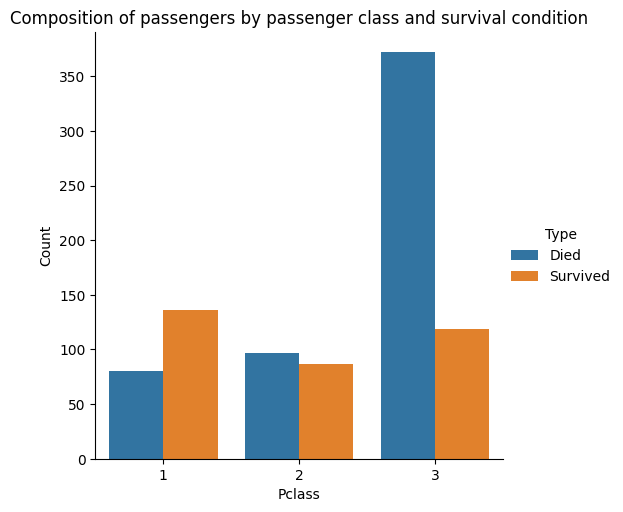

In [ ]:
p = sns.catplot(x='Pclass', y='Count', hue='Type', data=df1, kind='bar')
p.set(ylabel = 'Count',
      title= 'Composition of passengers by passenger class and survival condition')

# **II. Histogram**

<Axes: xlabel='Fare', ylabel='Count'>

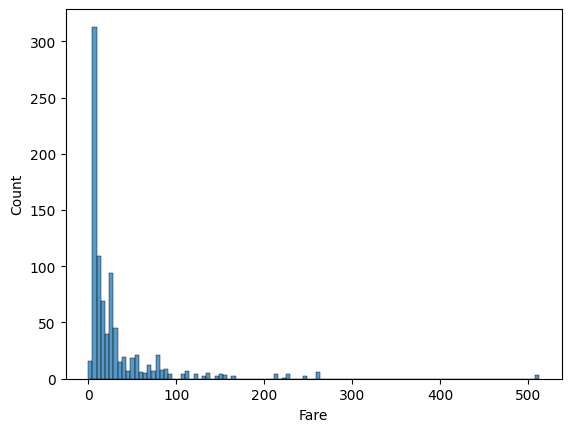

In [ ]:
sns.histplot(data=df, x='Fare')

<Axes: xlabel='Fare', ylabel='Count'>

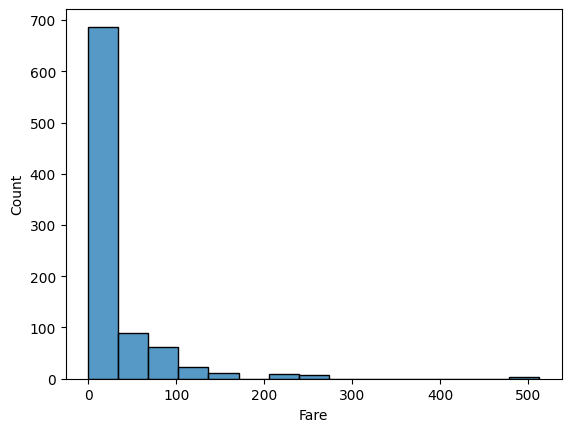

In [ ]:
sns.histplot(data=df, x='Fare', bins=15)

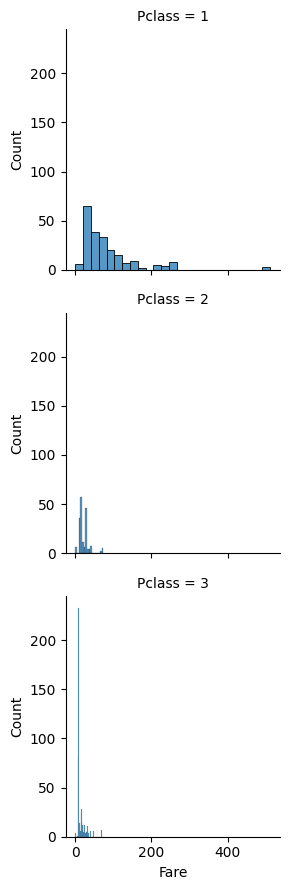

In [ ]:
g = sns.FacetGrid(data=df, col='Pclass', col_wrap=1)

#add histograms to each plot
g.map(sns.histplot, 'Fare')

# **III. Frequency Polygon**